In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("flight_Data.csv")
df.head()

,DATE,TIME,FLIGHT,FROM,TO,AIRLINE,AIRCRAFT,STATUS,TEMPERRATURE_departures,WIND_departures,...,scheduled_departures,actual_departures,scheduled_arrival,actual_arrival,delay_departure,direction_departure,delay_arrival,direction_arrival,scheduled_departure_hour,scheduled_arrival_hour
0,"Tuesday, May 16",12:20,U21265,Basel (BSL),Tel_Aviv,easyJet,A320 (HB-JXO),Landed 12:26,11,8,...,7:15,7:20,12:20,12:26,5,1,6,1,7,12
1,"Tuesday, May 16",12:20,7L218,Baku (GYD),Tel_Aviv,Silk Way West Airlines,B744 (4K-SW888),Landed 20:29,14,6,...,10:00,18:37,12:20,20:29,517,1,489,1,10,12
2,"Tuesday, May 16",12:35,TK862,Istanbul (IST),Tel_Aviv,Turkish Airlines,A320 (TC-JPH),Landed 13:04,14,10,...,10:30,11:03,12:35,13:04,33,1,29,1,10,12
3,"Tuesday, May 16",12:40,GF972,Bahrain (BAH),Tel_Aviv,Gulf Air,A21N (A9C-NC),Landed 12:24,31,4,...,9:50,9:50,12:40,12:24,0,0,-16,-1,9,12
4,"Tuesday, May 16",12:50,A3526,Rhodes (RHO),Tel_Aviv,Aegean Airlines,A320 (SX-DVX),Landed 12:43,19,10,...,11:20,11:28,12:50,12:43,8,1,-7,-1,11,12


In [4]:
df['Delay_Category'] = df['delay_arrival'].apply(lambda x: 'Delayed' if x > 15 else 'Not Delayed')


C:\Users\AcerPredator\AppData\Local\Temp\ipykernel_10268\271693322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Delay_Category', palette='Set2')


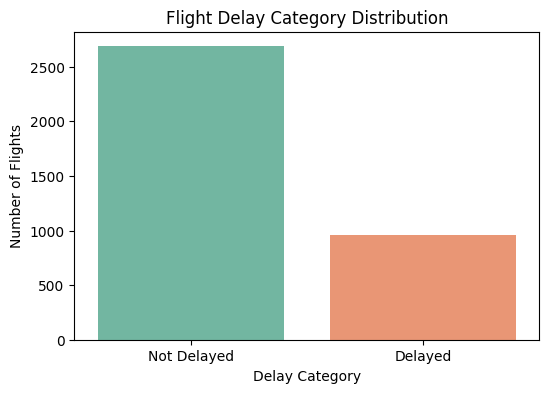

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Delay_Category', palette='Set2')
plt.title('Flight Delay Category Distribution')
plt.xlabel('Delay Category')
plt.ylabel('Number of Flights')
plt.show()

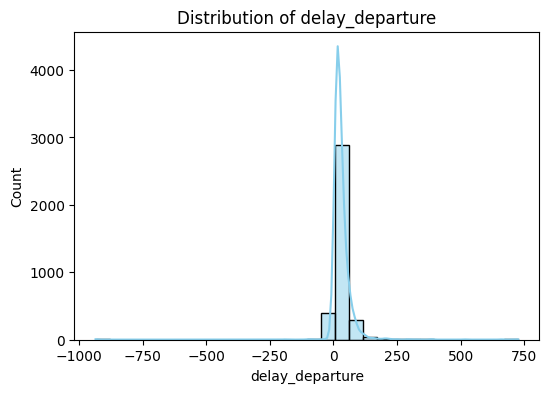

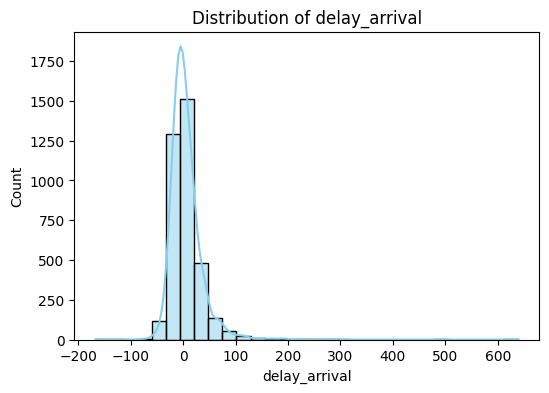

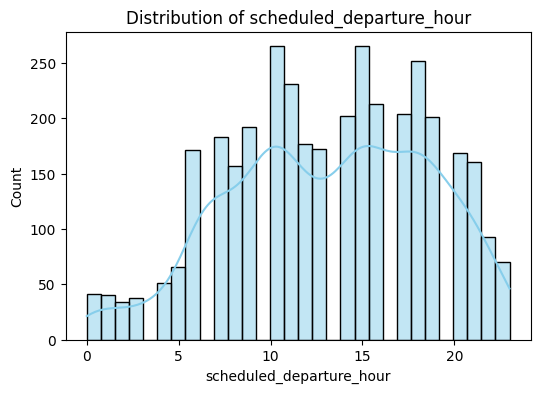

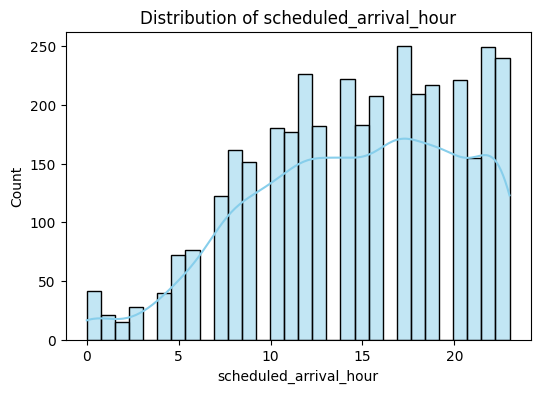

In [6]:
numerical_features = ['delay_departure', 'delay_arrival', 'scheduled_departure_hour', 'scheduled_arrival_hour']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

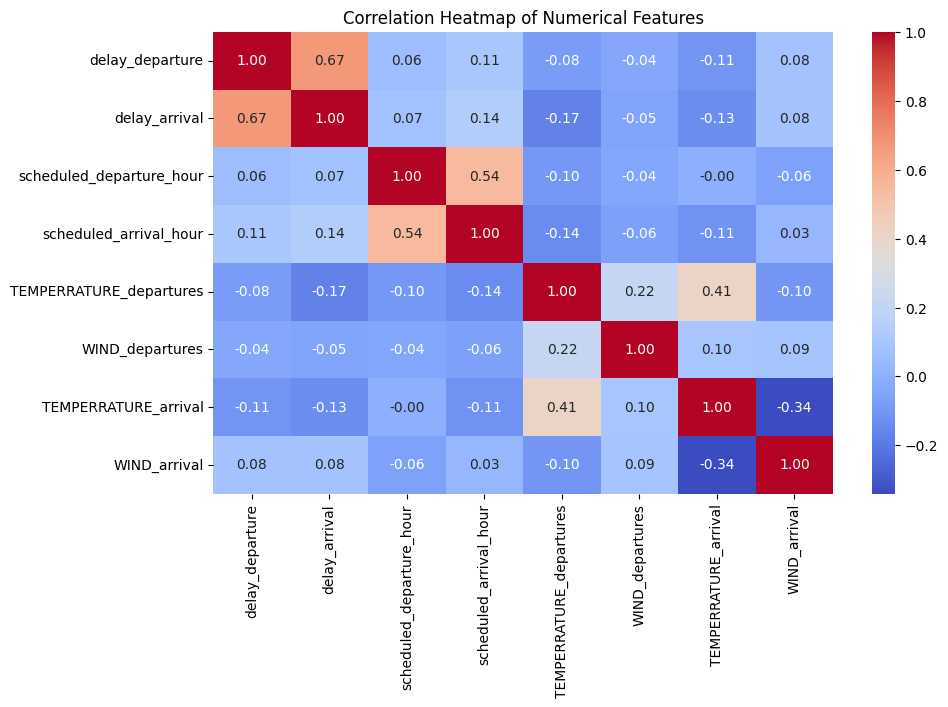

In [7]:
numeric_cols = ['delay_departure', 'delay_arrival', 'scheduled_departure_hour', 'scheduled_arrival_hour', 
                'TEMPERRATURE_departures', 'WIND_departures', 'TEMPERRATURE_arrival', 'WIND_arrival']

plt.figure(figsize=(10,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

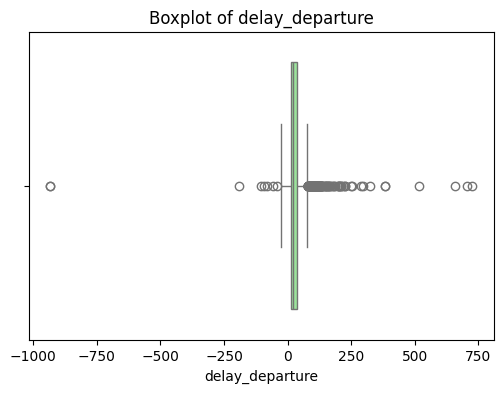

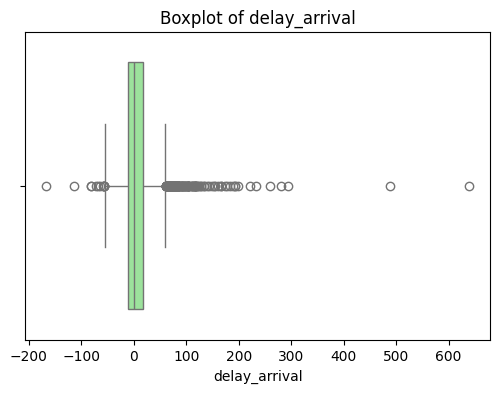

In [8]:
for col in ['delay_departure', 'delay_arrival']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [13]:

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv("flight_data.csv")

# 1 = Delayed, 0 = Not Delayed
df['Delay_Category'] = df['delay_arrival'].apply(lambda x: 1 if x > 15 else 0)

features = [
    'delay_departure',
    'TEMPERRATURE_departures',
    'WIND_departures',
    'TEMPERRATURE_arrival',
    'WIND_arrival',
    'scheduled_departure_hour',
    'scheduled_arrival_hour'
]

X = df[features].fillna(0)
y = df['Delay_Category']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


results = []
fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "ROC AUC": round(roc_auc_score(y_test, y_prob), 4)
    })


results_df = pd.DataFrame(results)
print("\nTABLE COMPARISON OF CLASSIFICATION RESULTS\n")
print(results_df)



TABLE COMPARISON OF CLASSIFICATION RESULTS

                 Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Logistic Regression    0.8781     0.8533  0.6564    0.7420   0.9313
1        Decision Tree    0.8521     0.7231  0.7231    0.7231   0.8111
2        Random Forest    0.8849     0.8208  0.7282    0.7717   0.9357


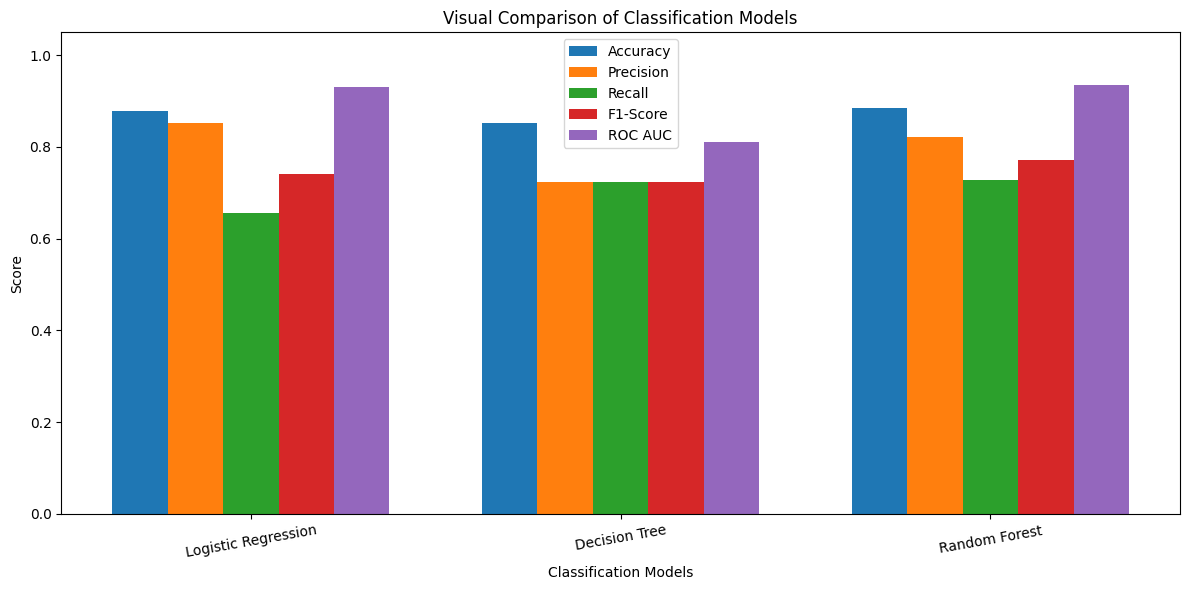

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

# Model names
models = results_df['Model']

# X locations
x = np.arange(len(models))
width = 0.15

# Create bar chart
plt.figure(figsize=(12,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

# Labels and title
plt.xlabel("Classification Models")
plt.ylabel("Score")
plt.title("Visual Comparison of Classification Models")
plt.xticks(x + width*2, models, rotation=10)
plt.ylim(0, 1.05)
plt.legend()

plt.tight_layout()
plt.show()


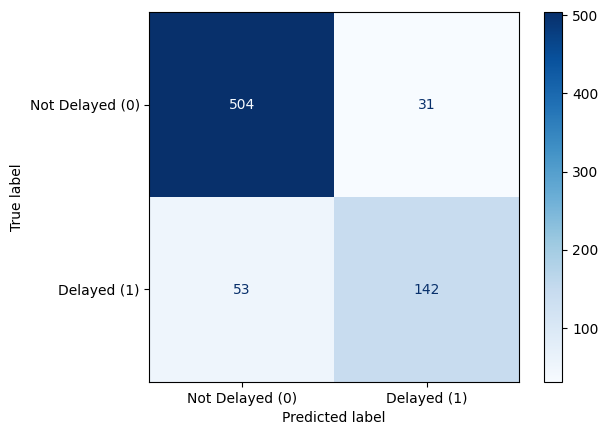

<Figure size 600x500 with 0 Axes>

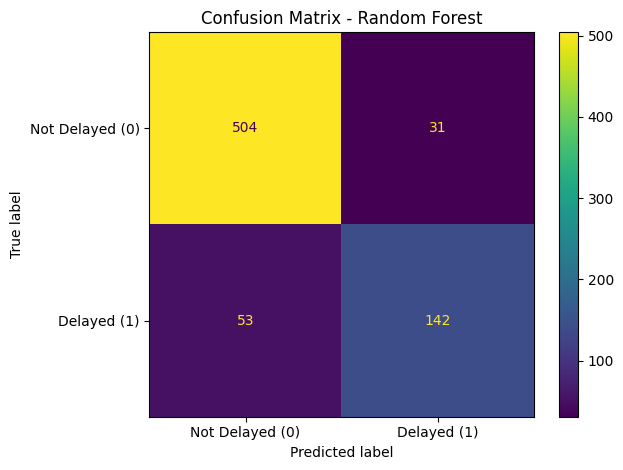

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# pick best model by F1 (you can change to Accuracy if you want)
best_model_name = results_df.sort_values("F1-Score", ascending=False).iloc[0]["Model"]
best_model = fitted_models[best_model_name]

y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)  # y_test is 0/1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Delayed (0)", "Delayed (1)"])
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

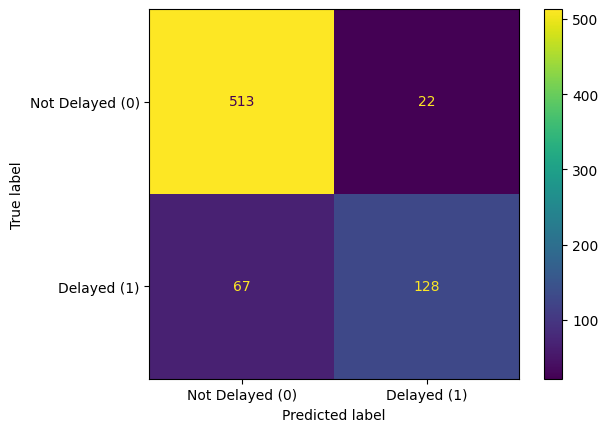

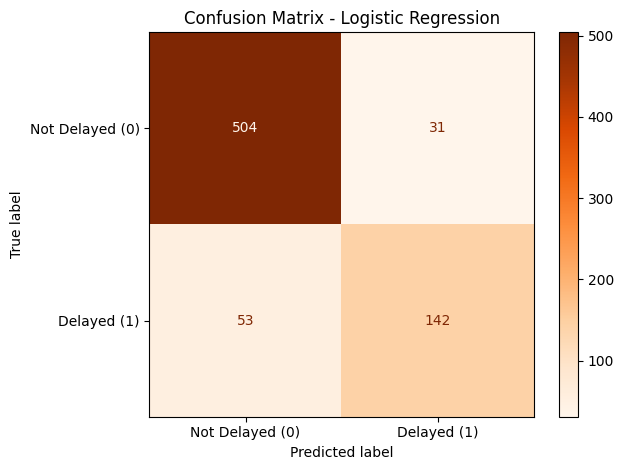

<Figure size 600x500 with 0 Axes>

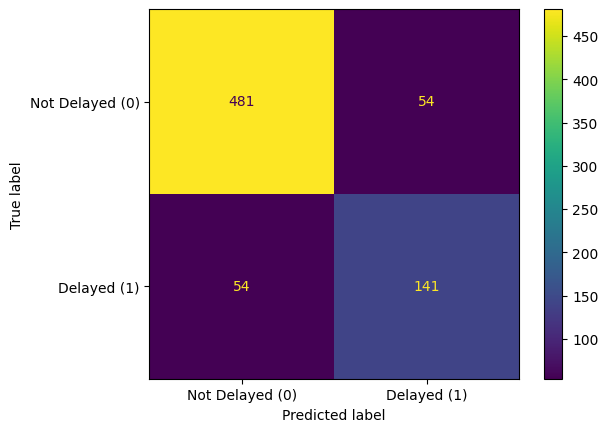

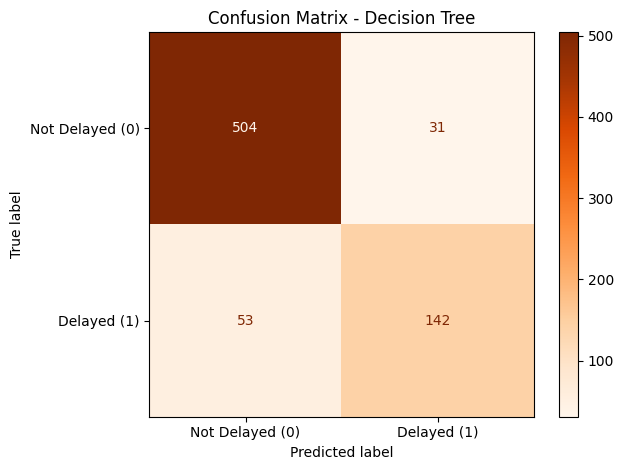

<Figure size 600x500 with 0 Axes>

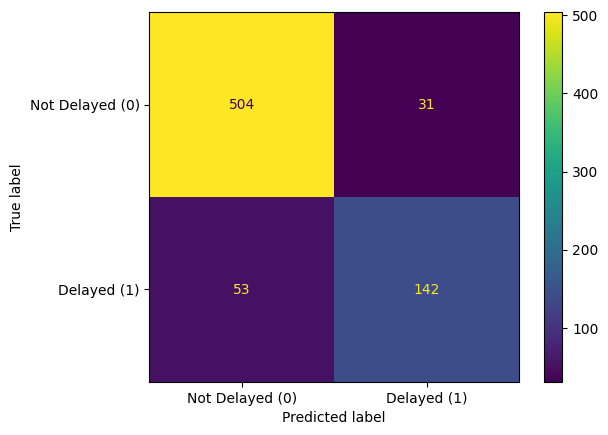

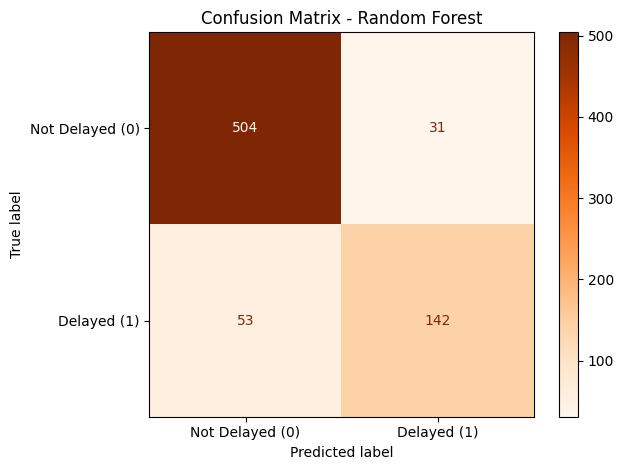

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    ConfusionMatrixDisplay(cm, display_labels=["Not Delayed (0)", "Delayed (1)"]).plot(values_format="d")
    disp.plot(cmap=plt.cm.Oranges, values_format="d")

    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()


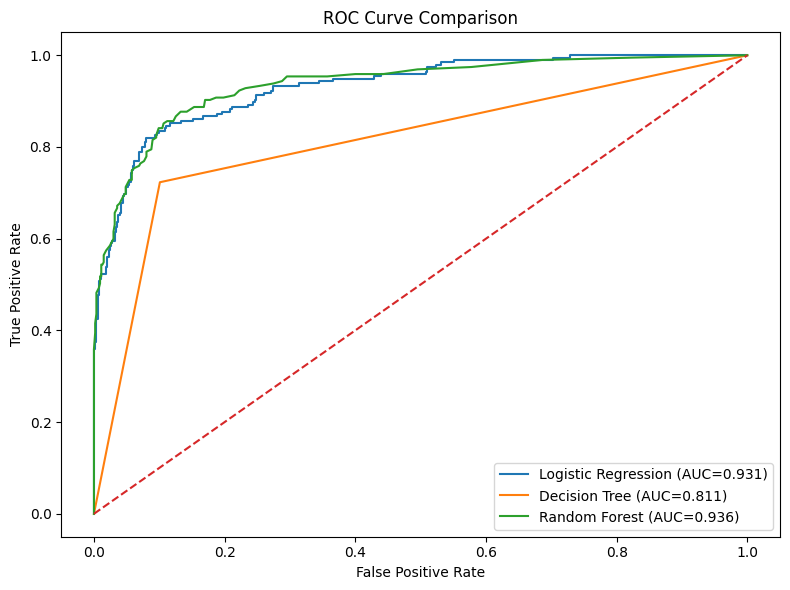

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in fitted_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()
